In [2]:
import numpy as np
from dataclasses import dataclass
import matplotlib.pyplot as plt

In [3]:
@dataclass
class Track:
    low_pt: bool = False
    score: float = -1.0
    cause: str = ""


def get_score(filename, pattern):
    tracks = []

    start_recording = False
    track = None
    with open(filename) as f:
        for line in f:
            if pattern in line:
                start_recording = True
                track = Track()

            if not start_recording:
                continue

            if "reject it" in line:
                if "Track pt < 500" in line:
                    track.low_pt = True
                track.cause = line.split("reject it")[0].strip()

            if "Track has Score:" in line:
                track.score = float(line.split()[-1])
                start_recording = False
                tracks.append(track)
    return tracks


def draw_scores(score_info):
    score_arrays = np.array([[track.low_pt, track.score] for track in score_info])
    plt.hist(score_arrays[score_arrays[:, 1] != 0, 1], bins=100)
    plt.xlabel("Track Score")
    plt.show()

    zero_scores = score_arrays[score_arrays[:, 1] == 0]
    low_pt = score_arrays[score_arrays[:, 0] == 1]
    low_pt_and_zero = score_arrays[np.logical_and(score_arrays[:, 0] == 1, score_arrays[:, 1] == 0)]
    print(len(zero_scores), len(low_pt), len(low_pt_and_zero))

2565


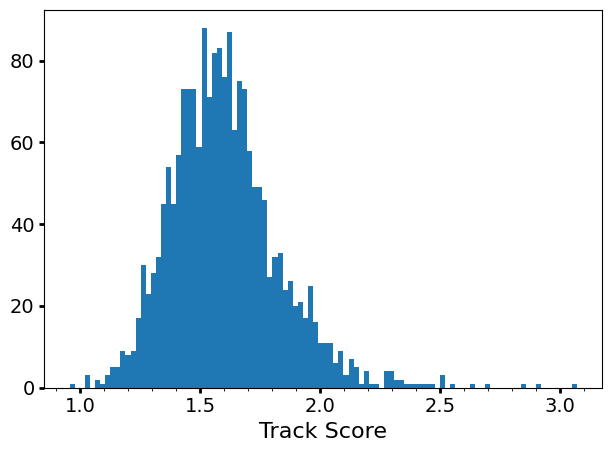

672 605 605


In [4]:
file_name = "/pscratch/sd/x/xju/ITk/ForFinalPaper/run_athena/run/log.gnnTrition_with_AR.txt"
start_track_pattern = "ITkAmbiguityScoreGNN.ITkAm...ITkAmbiScoringToolGNN  DEBUG ==> this is"
score_tool = get_score(file_name, start_track_pattern)
print(len(score_tool))

draw_scores(score_tool)


In [9]:
for info in score_tool:
    if info.score == 0 and not info.low_pt and "Track Rphi impact" not in info.cause:
        print(info.cause)

RAWtoALL 21:58:17 ITkAmbiguityScoreGNN.ITkAm...ITkAmbiScoringToolGNN  DEBUG Track Z impact > 250,


1714


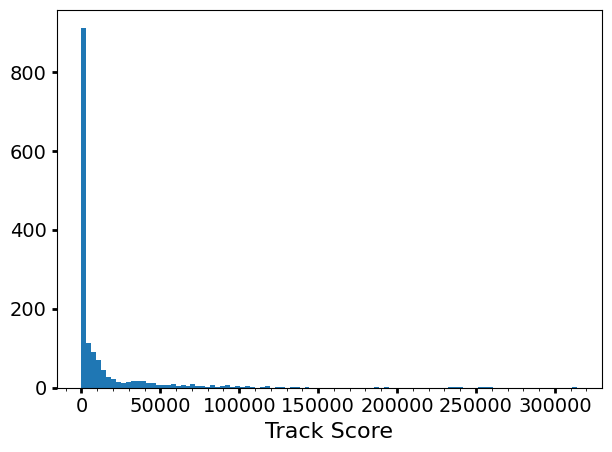

193 3 3


In [25]:
file_name = "/pscratch/sd/x/xju/ITk/ForFinalPaper/run_athena/run/log.gnnTrition_with_AR.txt"
start_track_pattern = "ITkAmbiguitySolverGNN.ITkA...ITkAmbiScoringToolGNN  DEBUG ==> this is"
tracks = get_score(file_name, start_track_pattern)
print(len(tracks))

arrays = np.array([[track.low_pt, track.score] for track in tracks])
plt.hist(arrays[arrays[:, 1] != 0, 1], bins=100)
plt.xlabel("Track Score")
plt.show()

zero_scores = arrays[arrays[:, 1] == 0]
low_pt = arrays[arrays[:, 0] == 1]
low_pt_and_zero = arrays[np.logical_and(arrays[:, 0] == 1, arrays[:, 1] == 0)]
print(len(zero_scores), len(low_pt), len(low_pt_and_zero))

Text(0.5, 0, 'Track Score')

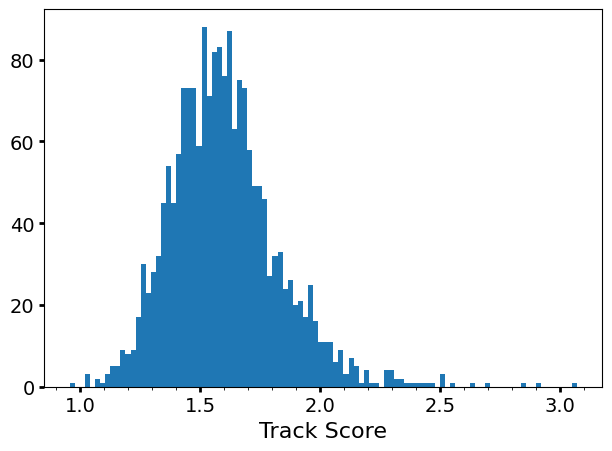

672 605 605
